In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [78]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
df = pd.read_csv(url)
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [79]:
cols = df.columns.str.lower().str.replace(r'\s+','_', regex=True)
cols.to_list()

['laptop',
 'status',
 'brand',
 'model',
 'cpu',
 'ram',
 'storage',
 'storage_type',
 'gpu',
 'screen',
 'touch',
 'final_price']

In [80]:
df.columns = cols
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [81]:
df.final_price.max(), df.final_price.min()

(7150.47, 201.05)

Text(0.5, 1.0, 'Price distribution')

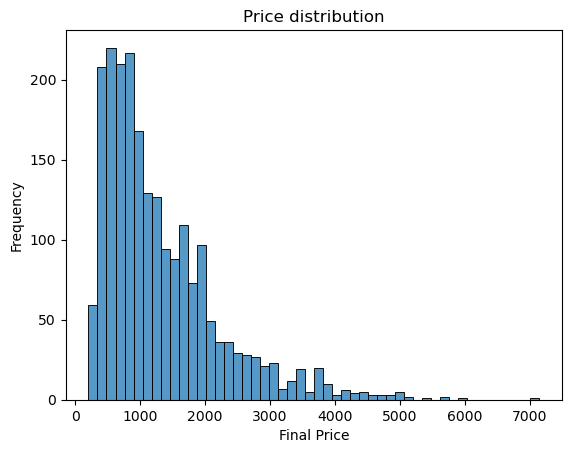

In [152]:
# fp = np.log1p(df.final_price)
fp = df.final_price
sns.histplot(fp, bins=50)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Price distribution')

In [83]:
features = ['ram', 'storage', 'screen', 'final_price']

In [84]:
df.ram.unique(), df.storage.unique(), df.screen.unique(), df.final_price.unique()

(array([  8,  16,  32,  12,   4,  64, 128,   6,  40]),
 array([ 512,  256, 1000,   64,  128,   32,    0, 2000,  500, 4000, 3000,
         240]),
 array([15.6 , 17.3 , 14.  , 16.1 , 13.3 , 16.  , 13.6 , 17.  , 15.3 ,
        14.5 , 13.4 , 14.2 , 18.  , 14.1 , 12.4 , 13.5 , 16.2 , 15.  ,
        11.6 , 13.  , 10.5 , 14.4 ,   nan, 12.3 , 15.4 , 12.5 , 10.1 ,
        10.95, 12.  , 13.9 ]),
 array([1009.  ,  299.  ,  789.  , ..., 2699.99, 1899.99, 1699.99]))

In [85]:
s = df.isnull().sum()
c = set(s[s != 0].index.to_list())
c.intersection(features)

{'screen'}

In [86]:
df.ram.median()

16.0

In [87]:
df = df[features]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [88]:
np.random.seed(42)

# df = df.sample(frac=1).reset_index(drop=True)

number_of_rows = df.shape[0]
indexes = np.arange(number_of_rows)
np.random.shuffle(indexes)
indexes

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [89]:
validation_precentage, test_precentage = 0.2, 0.2

validation_number_of_rows = int(number_of_rows * validation_precentage)
test_number_of_rows = int(number_of_rows * test_precentage)
train_number_of_rows = number_of_rows - validation_number_of_rows - test_number_of_rows

res = validation_number_of_rows, test_number_of_rows, train_number_of_rows
assert sum(list(res)) == number_of_rows

df_train = df.iloc[indexes[:train_number_of_rows]]
df_validation = df.iloc[indexes[train_number_of_rows:train_number_of_rows+validation_number_of_rows]]
df_test = df.iloc[indexes[train_number_of_rows+validation_number_of_rows:]]

assert number_of_rows == df_train.shape[0] + df_validation.shape[0] + df_test.shape[0]

In [90]:
df_train.shape, df_validation.shape, df_test.shape

((1296, 4), (432, 4), (432, 4))

In [91]:
df_train = df_train.reset_index(drop=True)
df_validation = df_validation.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [92]:
# y_train = np.log1p(df_train.final_price.values)
# y_validation = np.log1p(df_validation.final_price.values)
# y_test = np.log1p(df_test.final_price.values)

y_train = df_train.final_price.values
y_validation = df_validation.final_price.values
y_test = df_test.final_price.values

In [93]:
del df_train['final_price']
del df_validation['final_price']
del df_test['final_price']

In [94]:
def prepare_X(df, fill_na_with):
    return df.copy().fillna(fill_na_with).values

In [95]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [96]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [97]:
X_train = prepare_X(df_train, fill_na_with=0)
w0, w = train_linear_regression(X_train, y_train)
w0, w

(676.8954853003689, array([ 43.70681555,   0.86506867, -36.10399833]))

In [98]:
y_pred = w0 + X_train.dot(w)

Text(0.5, 1.0, 'Predictions vs actual distribution')

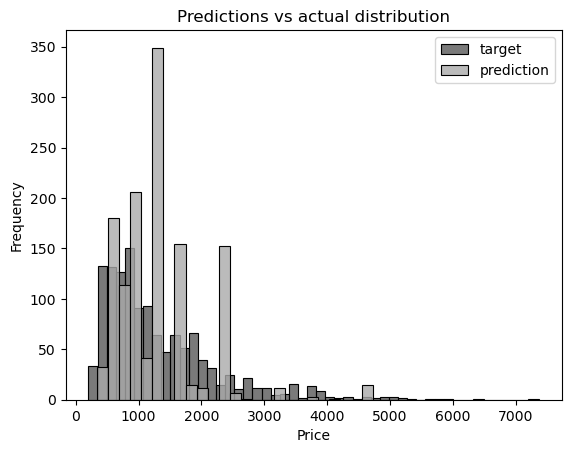

In [99]:
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Predictions vs actual distribution')

In [100]:
rmse(y_train, y_pred)

602.3920520606714

In [101]:
X_train = prepare_X(df_train, fill_na_with=df_train.screen.mean())
w0, w = train_linear_regression(X_train, y_train)
w0, w

(808.915990733356, array([ 43.90774584,   0.87135236, -45.18273312]))

In [102]:
y_pred = w0 + X_train.dot(w)

Text(0.5, 1.0, 'Predictions vs actual distribution')

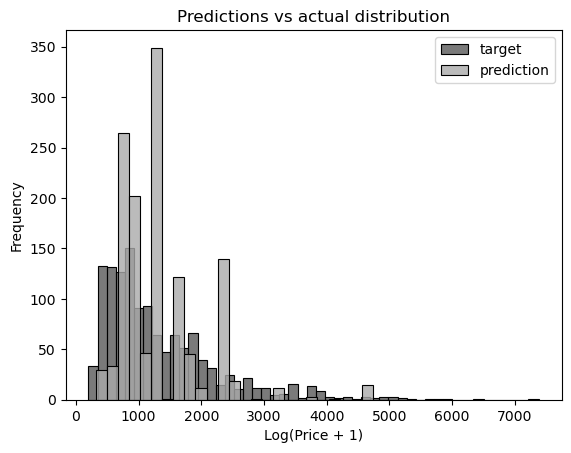

In [103]:
sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

In [104]:
rmse(y_train, y_pred)

602.1844959403247

### Q3

In [106]:
X_train = prepare_X(df_train, fill_na_with=0)
w0, w = train_linear_regression(X_train, y_train)

X_validation = prepare_X(df_validation, fill_na_with=0)
y_pred = w0 + X_validation.dot(w)

err = rmse(y_validation, y_pred)
round(err, 2), err

(597.36, 597.3635593619622)

In [107]:
X_train = prepare_X(df_train, fill_na_with=df_train.screen.mean())
w0, w = train_linear_regression(X_train, y_train)

X_validation = prepare_X(df_validation, fill_na_with=df_train.screen.mean())
y_pred = w0 + X_validation.dot(w)

err = rmse(y_validation, y_pred)
round(err, 2), err

(600.27, 600.2650313748433)

In [108]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Q4

In [110]:
res = {}
X_train = prepare_X(df_train, fill_na_with=0)
X_validation = prepare_X(df_validation, fill_na_with=0)
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_validation.dot(w)
    err = rmse(y_validation, y_pred)
    res[r] = round(err, 2)
    print(f"{r=}, {res[r]=}")
min(res, key=res.get)

r=0, res[r]=597.36
r=0.01, res[r]=597.36
r=0.1, res[r]=597.35
r=1, res[r]=597.21
r=5, res[r]=597.01
r=10, res[r]=597.06
r=100, res[r]=597.9


5

### Q5

In [112]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

number_of_rows = df.shape[0]
validation_precentage, test_precentage = 0.2, 0.2
validation_number_of_rows = int(number_of_rows * validation_precentage)
test_number_of_rows = int(number_of_rows * test_precentage)
train_number_of_rows = number_of_rows - (validation_number_of_rows + test_number_of_rows)

errors = []

for seed in seeds:
    np.random.seed(seed)
    indexes = np.arange(number_of_rows)
    np.random.shuffle(indexes)
    
    # df = df.sample(frac=1).reset_index(drop=True)
    
    idxs = indexes[:train_number_of_rows]
    df_train = df.iloc[idxs]

    idxs = indexes[train_number_of_rows:train_number_of_rows+validation_number_of_rows]
    df_validation = df.iloc[idxs]

    idxs = indexes[train_number_of_rows+validation_number_of_rows:]
    df_test = df.iloc[idxs]
    
    df_train = df_train.reset_index(drop=True)
    df_validation = df_validation.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # y_train = np.log1p(df_train.final_price.values)
    # y_validation = np.log1p(df_validation.final_price.values)
    # y_test = np.log1p(df_test.final_price.values)

    y_train = df_train.final_price.values
    y_validation = df_validation.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_validation['final_price']
    del df_test['final_price']

    w0, w = train_linear_regression(prepare_X(df_train, fill_na_with=0), y_train)
    y_pred = w0 + prepare_X(df_validation, fill_na_with=0).dot(w)
    errors.append(rmse(y_validation, y_pred))

errors, round(np.std(errors), 3)

([565.4520868771004,
  636.798542305673,
  588.9558697907955,
  597.8148920012511,
  571.9627915111033,
  573.2383256618967,
  647.3438328407198,
  550.4398184485973,
  587.3335036169941,
  576.1017929433127],
 29.176)

### Q6

In [114]:
number_of_rows = df.shape[0]
validation_precentage, test_precentage = 0.2, 0.2
validation_number_of_rows = int(number_of_rows * validation_precentage)
test_number_of_rows = int(number_of_rows * test_precentage)
train_number_of_rows = number_of_rows - (validation_number_of_rows + test_number_of_rows)

np.random.seed(9)
indexes = np.arange(number_of_rows)
np.random.shuffle(indexes)

# df = df.sample(frac=1).reset_index(drop=True)

idxs = indexes[:train_number_of_rows]
df_train = df.iloc[idxs]

idxs = indexes[train_number_of_rows:train_number_of_rows+validation_number_of_rows]
df_validation = df.iloc[idxs]

idxs = indexes[train_number_of_rows+validation_number_of_rows:]
df_test = df.iloc[idxs]

df_train = df_train.reset_index(drop=True)
df_validation = df_validation.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# y_train = np.log1p(df_train.final_price.values)
# y_validation = np.log1p(df_validation.final_price.values)
# y_test = np.log1p(df_test.final_price.values)

y_train = df_train.final_price.values
y_validation = df_validation.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_validation['final_price']
del df_test['final_price']

df_combined = pd.concat([df_train, df_validation])
y_combined = np.concatenate([y_train, y_validation])

w0, w = train_linear_regression_reg(prepare_X(df_combined, fill_na_with=0), y_combined, r=0.001)
y_pred = w0 + prepare_X(df_test, fill_na_with=0).dot(w)

rmse(y_test, y_pred)


608.6099822049564

In [115]:
len(df_combined), len(y_combined)

(1728, 1728)